In [145]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [146]:
df = pd.read_csv(r"MarketPricePrediction.csv")
df.head()

market    month  year  quantity  priceMin  priceMax  priceMod state   
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB  \
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012

In [147]:
df.shape

(10227, 10)

In [148]:
df.tail()

market     month  year  quantity  priceMin  priceMax  priceMod   
10222  YEOLA(MS)  December  2011    131326       282       612       526  \
10223  YEOLA(MS)  December  2012    207066       485      1327      1136   
10224  YEOLA(MS)  December  2013    215883       472      1427      1177   
10225  YEOLA(MS)  December  2014    201077       446      1654      1456   
10226  YEOLA(MS)  December  2015    223315       609      1446      1126   

      state   city           date  
10222    MS  YEOLA  December-2011  
10223    MS  YEOLA  December-2012  
10224    MS  YEOLA  December-2013  
10225    MS  YEOLA  December-2014  
10226    MS  YEOLA  December-2015

# Data Wrangling

In [149]:
df.isnull().sum().sum()

0

In [150]:
df.describe()

year      quantity      priceMin      priceMax      priceMod
count  10227.000000  1.022700e+04  10227.000000  10227.000000  10227.000000
mean    2009.022294  7.660488e+04    646.944363   1212.760731    984.284345
std        4.372841  1.244087e+05    673.121850    979.658874    818.471498
min     1996.000000  2.000000e+01     16.000000    145.000000     80.000000
25%     2006.000000  8.898000e+03    209.000000    557.000000    448.000000
50%     2009.000000  2.746000e+04    440.000000    923.000000    747.000000
75%     2013.000000  8.835650e+04    828.000000   1527.000000   1248.000000
max     2016.000000  1.639032e+06   6000.000000   8192.000000   6400.000000

In [151]:
df.shape

(10227, 10)

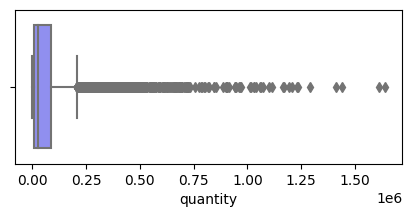

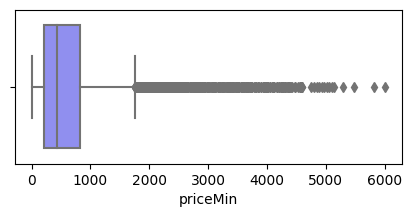

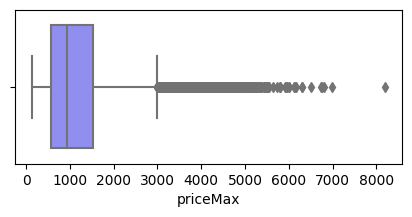

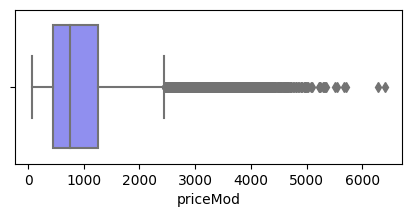

In [152]:
col = ['quantity','priceMin','priceMax','priceMod']
for i in col:
    plt.figure(figsize=(5,2))
    sb.boxplot(x=i,data=df,palette='cool')
    plt.show()

In [153]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [154]:
Sales_Zscore = detect_outliers(df['quantity'])
min(Sales_Zscore)

451297

In [155]:
Sales_Zscore = detect_outliers(df['priceMod'])
min(Sales_Zscore)

3446

In [156]:
df = df[df['quantity']<=451297]
df.shape

(10052, 10)

In [157]:
df = df[df['priceMod']<=3446]
df.shape

(9751, 10)

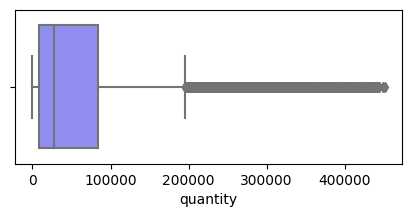

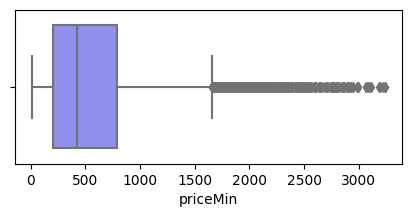

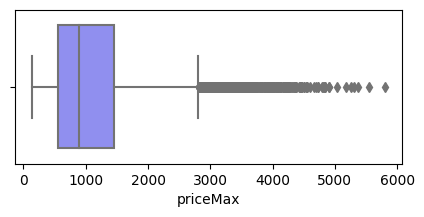

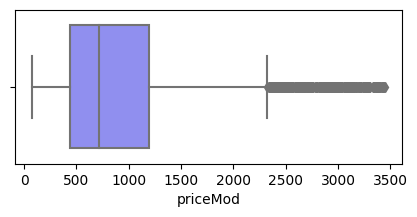

In [158]:
for i in col:
    plt.figure(figsize=(5,2))
    sb.boxplot(x=i,data=df,palette='cool')
    plt.show()

In [159]:
df.isnull().sum().sum()

0

In [160]:
for i in df.columns:  
    print(i)
    print('_'*20)
    print(df[i].unique())
    print('*'*65)
    print('\n')

market
____________________
['ABOHAR(PB)' 'AGRA(UP)' 'AHMEDABAD(GUJ)' 'AHMEDNAGAR(MS)' 'AJMER(RAJ)'
 'ALIGARH(UP)' 'ALWAR(RAJ)' 'AMRITSAR(PB)' 'BALLIA(UP)' 'BANGALORE'
 'BAREILLY(UP)' 'BELGAUM(KNT)' 'BHATINDA(PB)' 'BHAVNAGAR(GUJ)' 'BHOPAL'
 'BHUBNESWER(OR)' 'BIHARSHARIF(BHR)' 'BIJAPUR(KNT)' 'BIKANER(RAJ)'
 'BOMBORI(MS)' 'BURDWAN(WB)' 'CHAKAN(MS)' 'CHALLAKERE(KNT)' 'CHANDIGARH'
 'CHANDVAD(MS)' 'CHENNAI' 'CHICKBALLAPUR(KNT)' 'COIMBATORE(TN) (bellary)'
 'COIMBATORE(TN) (podisu)' 'DEESA(GUJ)' 'DEHRADOON(UTT)' 'DELHI'
 'DEORIA(UP)' 'DEVALA(MS)' 'DEWAS(MP)' 'DHAVANGERE(KNT)' 'DHULIA(MS)'
 'DINDIGUL(TN)' 'DINDIGUL(TN)(Podis' 'DINDORI(MS)' 'ETAWAH(UP)'
 'GONDAL(GUJ)' 'GORAKHPUR(UP)' 'GUWAHATI' 'HALDWANI(UTT)' 'HASSAN(KNT)'
 'HOSHIARPUR(PB)' 'HUBLI(KNT)' 'HYDERABAD' 'INDORE(MP)' 'JAIPUR'
 'JALANDHAR(PB)' 'JALGAON(MS)' 'JALGAON(WHITE)' 'JAMMU' 'JAMNAGAR(GUJ)'
 'JODHPUR(RAJ)' 'JUNNAR(MS)' 'KALVAN(MS)' 'KANPUR(UP)' 'KARNAL(HR)'
 'KHANNA(PB)' 'KOLAR(KNT)' 'KOLHAPUR(MS)' 'KOLKATA' 'KOPERGAON(MS)'
 '

# Feature Engineering

In [161]:
df['date']= pd.to_datetime(df['date'])

In [162]:
df['priceMean']=(df['priceMax']+df['priceMin']) /2

In [163]:
df['priceMean'] = df['priceMean'].astype(int)

In [164]:
df['Net_Sales'] = df['quantity']*df['priceMean']

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9751 entries, 0 to 10226
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   market     9751 non-null   object        
 1   month      9751 non-null   object        
 2   year       9751 non-null   int64         
 3   quantity   9751 non-null   int64         
 4   priceMin   9751 non-null   int64         
 5   priceMax   9751 non-null   int64         
 6   priceMod   9751 non-null   int64         
 7   state      9751 non-null   object        
 8   city       9751 non-null   object        
 9   date       9751 non-null   datetime64[ns]
 10  priceMean  9751 non-null   int32         
 11  Net_Sales  9751 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(6), object(4)
memory usage: 952.2+ KB


In [166]:
df.head(3)

market    month  year  quantity  priceMin  priceMax  priceMod state   
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB  \
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   

     city       date  priceMean  Net_Sales  
0  ABOHAR 2005-01-01        448    1052800  
1  ABOHAR 2006-01-01        562     505800  
2  ABOHAR 2010-01-01       1437    1135230

# EDA

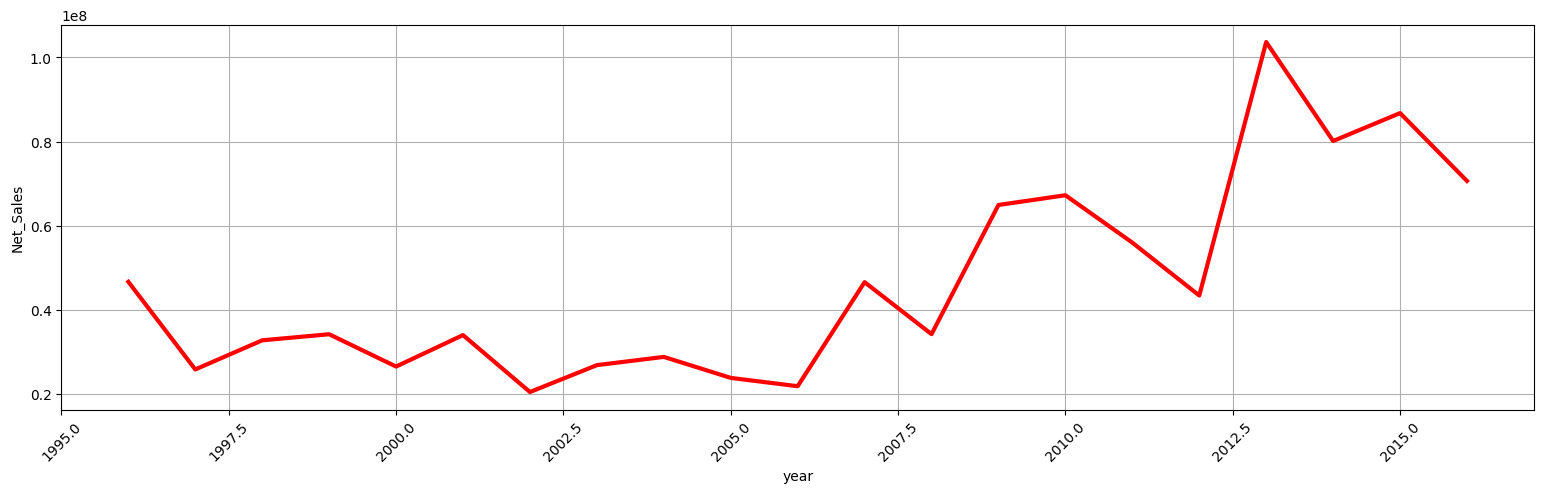

In [167]:
plt.figure(figsize=(19,5))
a = df.groupby('year',as_index=False)['Net_Sales'].mean()
b = sb.lineplot(x='year',y='Net_Sales',data=a,palette='autumn',color='r',linewidth=3)
for i in b.containers:
    b.bar_label(i)
plt.xticks(rotation=45)
plt.grid()
plt.show()

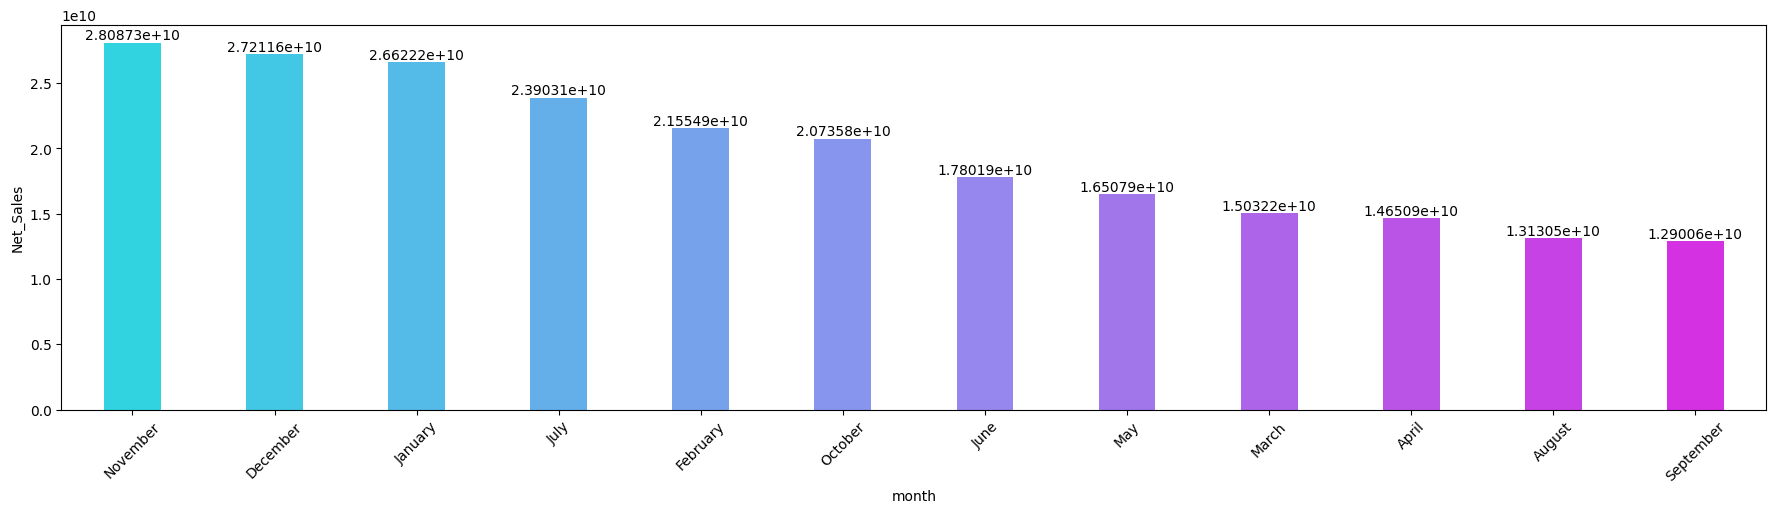

In [168]:
year_12_15 = df[(df['year']>=2012) & (df['year']<=2016)]

plt.figure(figsize=(22,5))
a = year_12_15.groupby('month',as_index=False)['Net_Sales'].sum().sort_values(by='Net_Sales',ascending=False)
b = sb.barplot(x='month',y='Net_Sales',data=a,palette='cool',width=0.4)
for i in b.containers:
    b.bar_label(i)
plt.xticks(rotation=45)
plt.show()

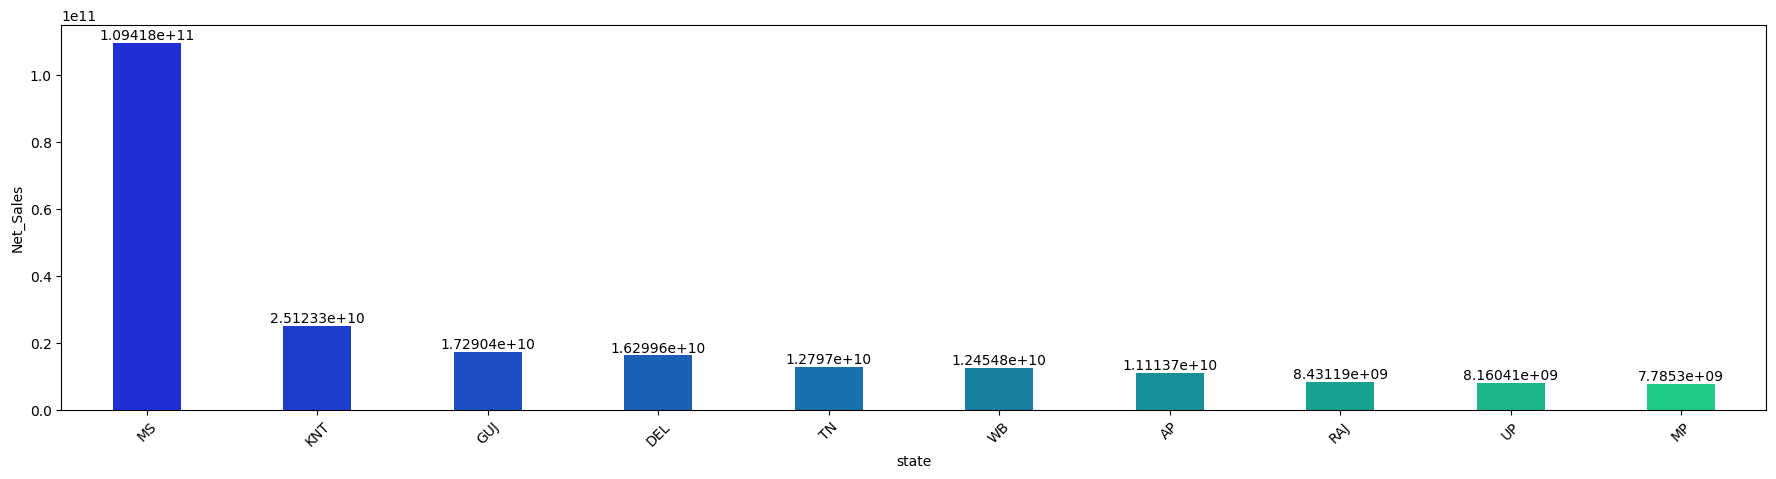

In [169]:
year_12_15 = df[(df['year']>=2012) & (df['year']<=2016)]

plt.figure(figsize=(22,5))
a = year_12_15.groupby('state',as_index=False)['Net_Sales'].sum().sort_values(by='Net_Sales',ascending=False)[:10]
b = sb.barplot(x='state',y='Net_Sales',data=a,palette='winter',width=0.4)
for i in b.containers:
    b.bar_label(i)
plt.xticks(rotation=45)
plt.show()

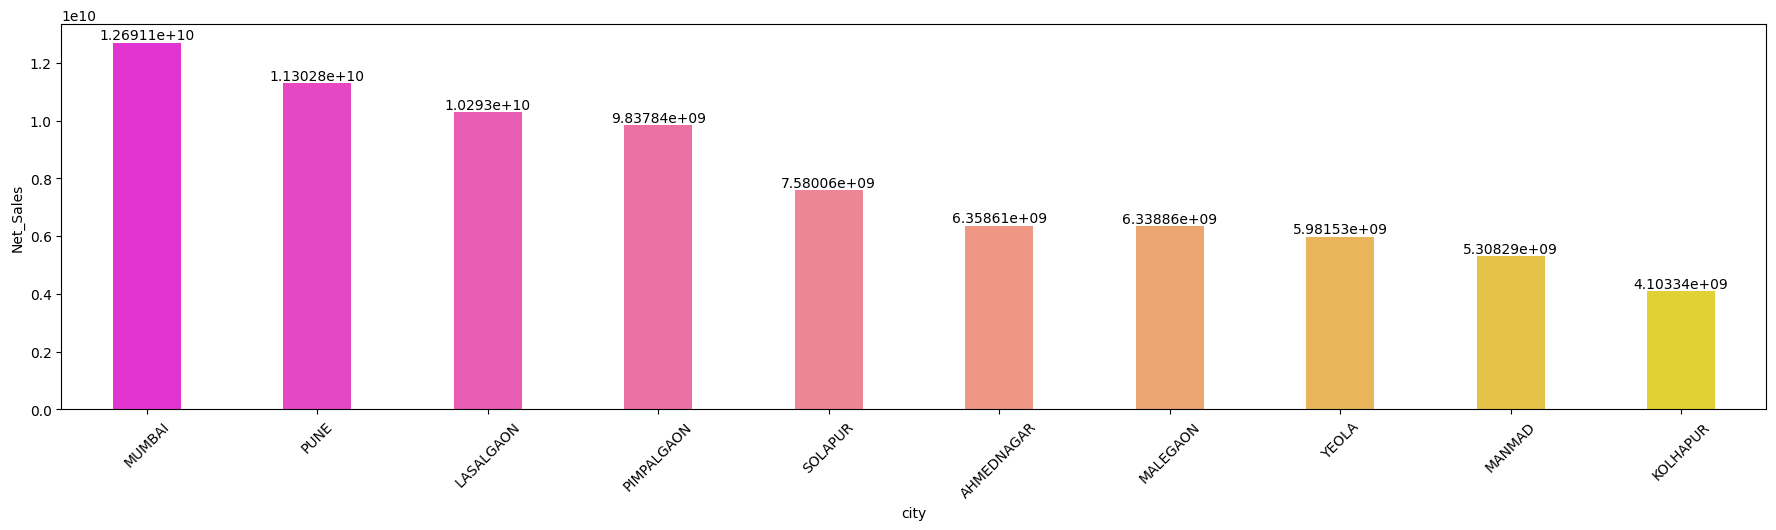

In [170]:
year_12_15 = df[(df['year']>=2012) & (df['year']<=2016)]
ms_state = year_12_15[year_12_15['state']== 'MS']

plt.figure(figsize=(22,5))
a = ms_state.groupby('city',as_index=False)['Net_Sales'].sum().sort_values(by='Net_Sales',ascending=False)[:10]
b = sb.barplot(x='city',y='Net_Sales',data=a,palette='spring',width=0.4)
for i in b.containers:
    b.bar_label(i)
plt.xticks(rotation=45)
plt.show()

### Final Result --> In the year of 2012 - 2016 the Net_Sales was high in the State-MS.

# Feature Selection

In [171]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date', 'priceMean', 'Net_Sales'],
      dtype='object')

In [172]:
df.head(3)

market    month  year  quantity  priceMin  priceMax  priceMod state   
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB  \
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   

     city       date  priceMean  Net_Sales  
0  ABOHAR 2005-01-01        448    1052800  
1  ABOHAR 2006-01-01        562     505800  
2  ABOHAR 2010-01-01       1437    1135230

In [173]:
df.drop(columns=['market','month','year','quantity','priceMin','priceMax','priceMod','state','city','priceMean'],inplace=True)
df.columns

Index(['date', 'Net_Sales'], dtype='object')

In [174]:
df.set_index('date',inplace=True)
df.head(3)

Net_Sales
date                 
2005-01-01    1052800
2006-01-01     505800
2010-01-01    1135230

In [175]:
df.to_csv('Cleaned Data')

# Machine Learning

## Resampling

<Axes: xlabel='date'>

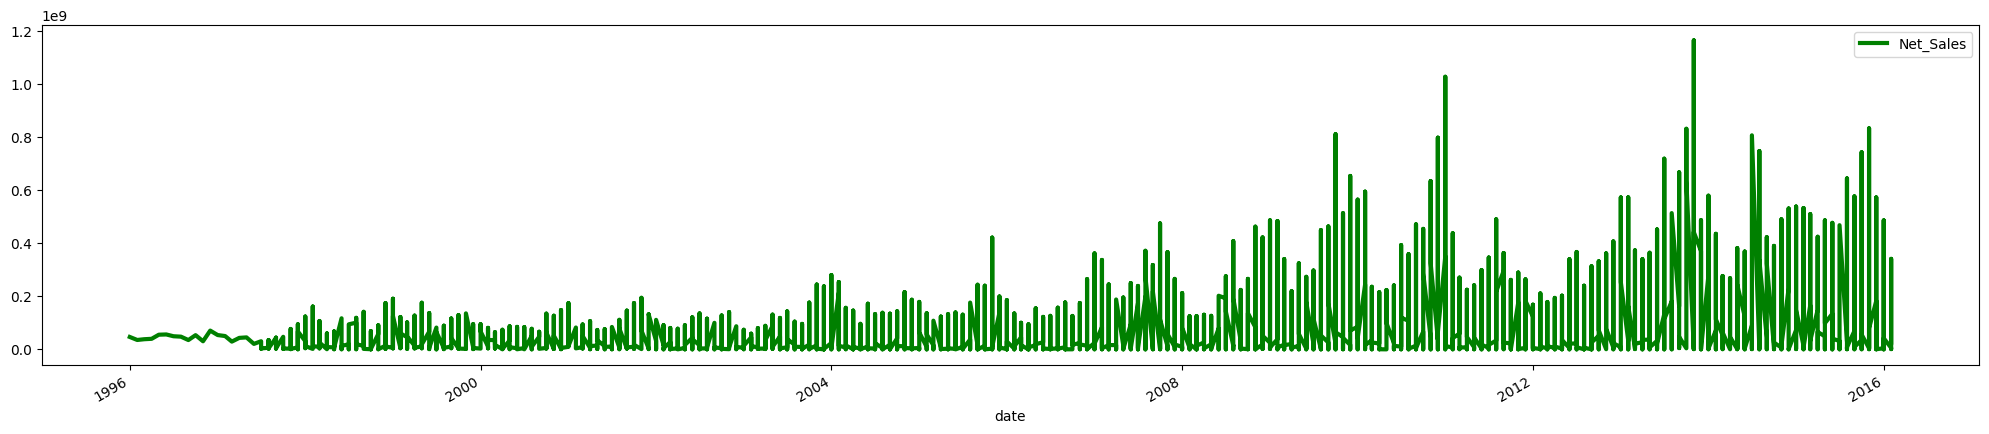

In [176]:
df.plot(figsize=(25,5),color='g',linewidth=3)

In [177]:
tf = df['Net_Sales'].resample('M').sum()

<Axes: xlabel='date'>

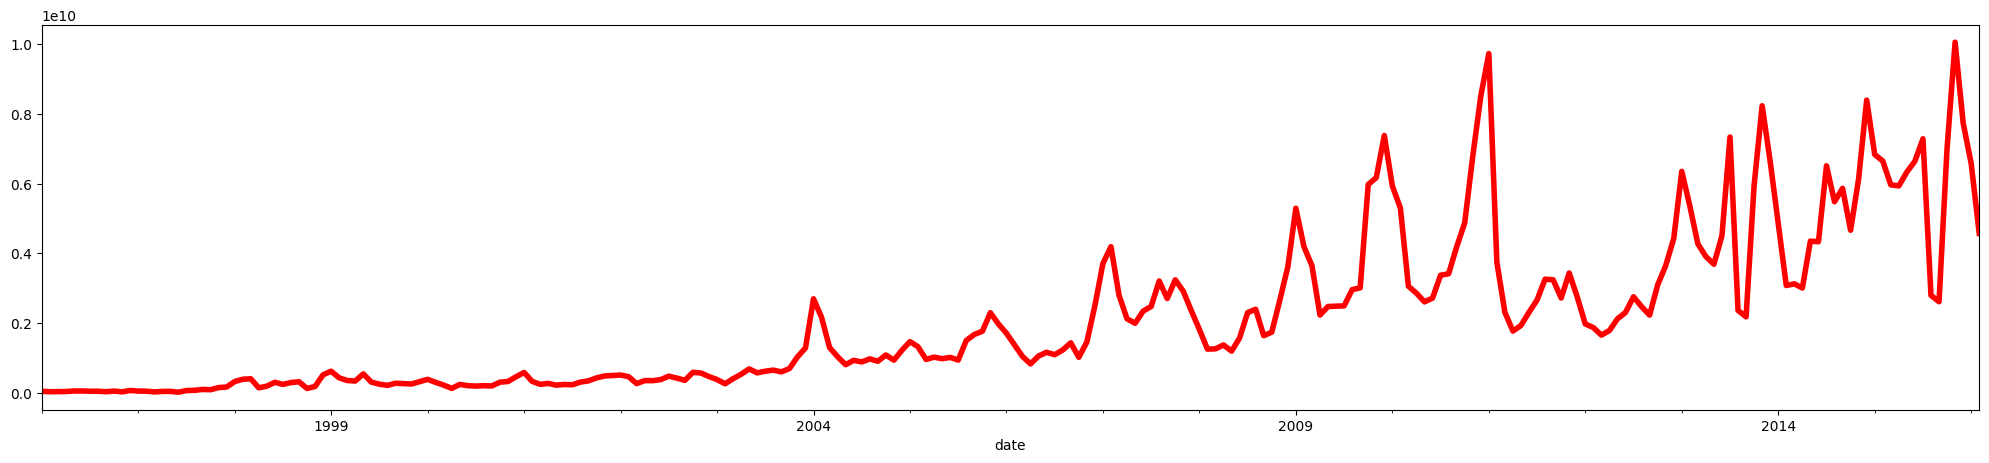

In [178]:
tf.plot(figsize=(25,5),color='r',linewidth=4)

## Decomposition

In [179]:
import statsmodels.api as sm

<Figure size 2500x500 with 0 Axes>

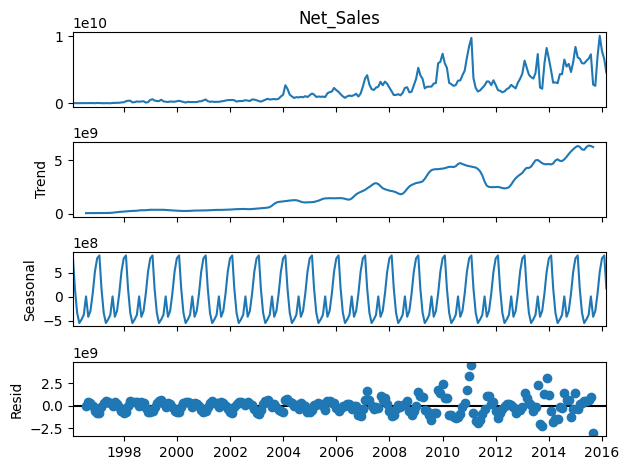

In [180]:
decomposition = sm.tsa.seasonal_decompose(tf)
plt.figure(figsize=(25,5))
fig= decomposition.plot()
plt.show()

## Stationarity Check

In [181]:
from statsmodels.tsa.stattools import adfuller

In [182]:
def adf_test(series):
    result = adfuller(series)
    print('Adfuller Statistics : {}'.format(result[0]))
    print('P - Value : {}'.format(result[1]))
    if result[1] <= 0.05:
        print('Rejection of Null Hypothesis & Data is Stationary')
    else:
        print('Acceptance of Null Hypothesis & Data is Non-Stationary')

In [183]:
adf_test(tf)

Adfuller Statistics : -0.1687997918104546
P - Value : 0.9421398504801229
Acceptance of Null Hypothesis & Data is Non-Stationary


In [184]:
adfuller(tf)

(-0.1687997918104546,
 0.9421398504801229,
 10,
 231,
 {'1%': -3.4589796764641,
  '5%': -2.8741347158661448,
  '10%': -2.573482381701992},
 9977.558565333798)

## Stationary Conversion

In [185]:
df['seasonal_first_difference'] = df['Net_Sales'] - df['Net_Sales'].shift(12)
df.head(15)

Net_Sales  seasonal_first_difference
date                                            
2005-01-01    1052800                        NaN
2006-01-01     505800                        NaN
2010-01-01    1135230                        NaN
2011-01-01     834960                        NaN
2012-01-01     625140                        NaN
2013-01-01    1088775                        NaN
2014-01-01     551320                        NaN
2015-01-01    2065815                        NaN
2005-02-01     455000                        NaN
2006-02-01     678600                        NaN
2010-02-01     722055                        NaN
2011-02-01     352500                        NaN
2012-02-01     391500                  -661300.0
2013-02-01    1369745                   863945.0
2014-02-01    1111655                   -23575.0

In [186]:
df = df.dropna()

In [187]:
df.head(4)

Net_Sales  seasonal_first_difference
date                                            
2012-02-01     391500                  -661300.0
2013-02-01    1369745                   863945.0
2014-02-01    1111655                   -23575.0
2015-02-01    1753895                   918935.0

In [188]:
sf = df['seasonal_first_difference'].resample('M').sum()

<Axes: xlabel='date'>

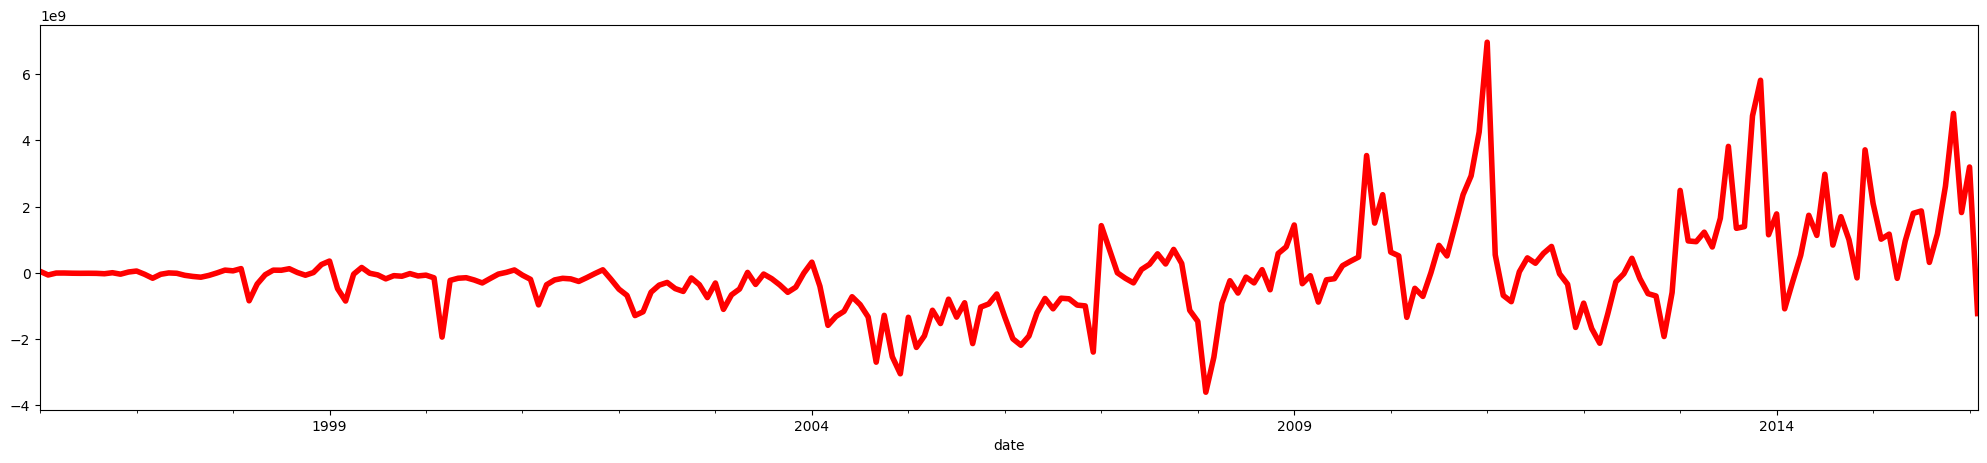

In [189]:
sf.plot(figsize=(25,5),color='r',linewidth=4)

In [190]:
adf_test(sf)

Adfuller Statistics : -5.544828453523302
P - Value : 1.6699927209584484e-06
Rejection of Null Hypothesis & Data is Stationary


In [191]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

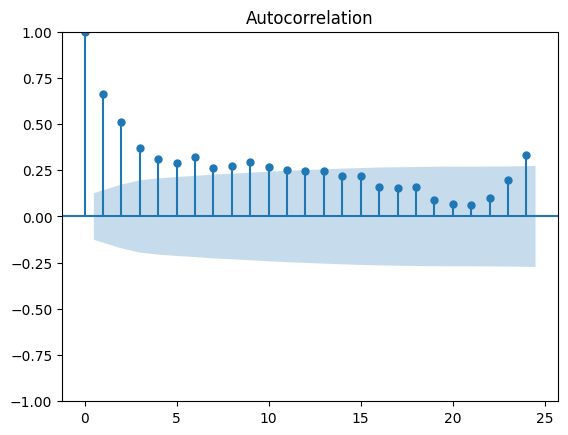

In [192]:
acf = plot_acf(sf)

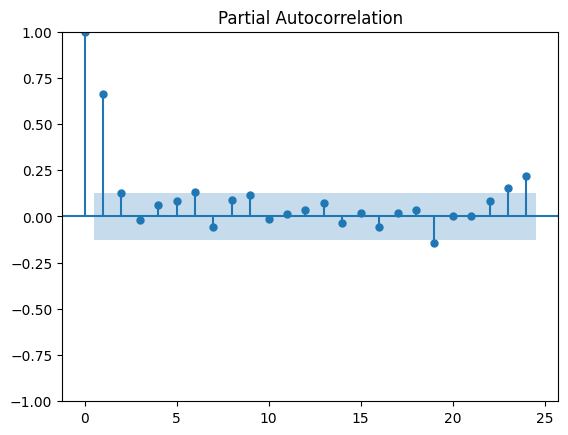

In [193]:
pacf = plot_pacf(sf)

##### p,d,q --->> p = AR model lags,,,, d = differencing,,,, q = Moving Average lags

Identification of AR model is best done with PACF,,,,,,,,
Identification of MA model is best done with ACF


ACF has exponential decrease, but the PACF has sudden decrease.
PACF ---->> p =2 , d =1, q = 2 

# Train Test Split

In [194]:
from datetime import datetime,timedelta

In [195]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [196]:
sf

date
1996-01-31    4.451067e+07
1996-02-29   -6.526674e+07
1996-03-31   -6.988080e+06
1996-04-30   -5.892356e+06
1996-05-31   -1.204393e+07
1996-06-30   -1.449475e+07
1996-07-31   -1.309234e+07
1996-08-31   -1.555107e+07
1996-09-30   -2.753422e+07
1996-10-31    2.917080e+06
1996-11-30   -4.065341e+07
1996-12-31    2.432387e+07
1997-01-31    5.394322e+07
1997-02-28   -4.468882e+07
1997-03-31   -1.634549e+08
1997-04-30   -4.409415e+07
1997-05-31   -3.091370e+06
1997-06-30   -1.375397e+07
1997-07-31   -7.525846e+07
1997-08-31   -1.091186e+08
1997-09-30   -1.320460e+08
1997-10-31   -7.831470e+07
1997-11-30   -2.834049e+06
1997-12-31    8.180919e+07
1998-01-31    5.971128e+07
1998-02-28    1.273376e+08
1998-03-31   -8.443860e+08
1998-04-30   -3.390137e+08
1998-05-31   -5.734516e+07
1998-06-30    8.059218e+07
1998-07-31    7.762850e+07
1998-08-31    1.233947e+08
1998-09-30    1.019800e+07
1998-10-31   -7.243428e+07
1998-11-30    8.470386e+06
1998-12-31    2.504156e+08
1999-01-31    3.552275e

In [197]:
train_df_end = datetime(2012,2,29)
test_df_end = datetime(2016,2,29)

In [198]:
train_data = sf[:train_df_end]
test_data = sf[train_df_end+timedelta(days=1):test_df_end]

In [199]:
train_data.shape

(194,)

In [200]:
test_data.shape

(48,)

In [201]:
prediction_start_date = test_data.index[0]
prediction_end_date = test_data.index[1]

# ARIMA Model

In [202]:
from statsmodels.tsa.arima.model import ARIMA

In [203]:
model_ARIMA=ARIMA(train_data,order=(24,1,24))

In [204]:
model_Arima_fit=model_ARIMA.fit()

In [205]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     seasonal_first_difference   No. Observations:                  194
Model:                      ARIMA(24, 1, 24)   Log Likelihood               -4197.639
Date:                       Tue, 28 May 2024   AIC                           8493.278
Time:                               16:49:27   BIC                           8653.150
Sample:                           01-31-1996   HQIC                          8558.021
                                - 02-29-2012                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1361      0.477      0.286      0.775      -0.798       1.070
ar.L2         -0.2195      0.524     -0.419      0.675      -1.246       0.807
ar.L3         -0.1035      0.497     -0.208      0.835      -1.078       0.871
ar.L4          0.1134      0.455      0.249      0.803      -0.779       1.006
ar.L5         -0.1002      0.528     -0.190      0.850      -1.135       0.935
ar.L6          0.0343      0.450      0.076      0.939      -0.848       0.917
ar.L7         -0.1114      0.467     -0.238      0.812      -1.028       0.805
ar.L8          0.2373      0.535      0.443      0.657      -0.812       1.286
ar.L9         -0.2924      0.427     -0.685      0.493      -1.129       0.545
ar.L10        -0.0890      0.431     -0.206      0.836      -0.934       0.756
ar.L11        -0.1493      0.330     -0.452      0.651      -0.797       0.498
ar.L12         0.0472      0.443      0.106      0.915      -0.821       0.916
ar.L13        -0.2631      0.381     -0.690      0.490      -1.011       0.484
ar.L14         0.2245      0.388      0.579      0.562      -0.535       0.984
ar.L15         0.0680      0.504      0.135      0.893      -0.919       1.055
ar.L16        -0.1344      0.461     -0.291      0.771      -1.038       0.770
ar.L17         0.0562      0.588      0.096      0.924      -1.095       1.208
ar.L18         0.2322      0.478      0.485      0.627      -0.705       1.170
ar.L19         0.1223      0.459      0.267      0.790      -0.777       1.021
ar.L20        -0.2871      0.529     -0.543      0.587      -1.324       0.750
ar.L21         0.2343      0.609      0.385      0.701      -0.960       1.429
ar.L22        -0.1087      0.394     -0.276      0.783      -0.881       0.663
ar.L23         0.1888      0.456      0.414      0.679      -0.705       1.083
ar.L24         0.4312      0.434      0.993      0.321      -0.420       1.282
ma.L1         -0.4919      0.596     -0.825      0.409      -1.660       0.677
ma.L2          0.2842      0.680      0.418      0.676      -1.048       1.616
ma.L3         -0.2468      0.653     -0.378      0.705      -1.526       1.033
ma.L4         -0.0838      0.580     -0.144      0.885      -1.221       1.054
ma.L5         -0.0383      0.776     -0.049      0.961      -1.560       1.483
ma.L6         -0.1476      0.598     -0.247      0.805      -1.319       1.024
ma.L7          0.1104      0.523      0.211      0.833      -0.915       1.135
ma.L8         -0.3963      0.514     -0.772      0.440      -1.403       0.610
ma.L9          0.4501      0.594      0.757      0.449      -0.715       1.615
ma.L10        -0.1551      0.495     -0.313      0.754      -1.126       0.816
ma.L11         0.2567      0.386      0.665      0.506      -0.500       1.013
ma.L12        -0.1965      0.515     -0.381      0.703      -1.207       0.814
ma.L13         0.4372      0.465      0.941      0.347      -0.474       1.348
ma.L14        -0.3

In [206]:
test_data

date
2012-03-31   -2.125438e+09
2012-04-30   -1.237802e+09
2012-05-31   -2.756042e+08
2012-06-30   -2.736354e+07
2012-07-31    4.388480e+08
2012-08-31   -1.777356e+08
2012-09-30   -6.283029e+08
2012-10-31   -6.992891e+08
2012-11-30   -1.923160e+09
2012-12-31   -5.948879e+08
2013-01-31    2.488009e+09
2013-02-28    9.634149e+08
2013-03-31    9.406701e+08
2013-04-30    1.226821e+09
2013-05-31    7.805678e+08
2013-06-30    1.647455e+09
2013-07-31    3.818031e+09
2013-08-31    1.343853e+09
2013-09-30    1.395472e+09
2013-10-31    4.737387e+09
2013-11-30    5.814612e+09
2013-12-31    1.148892e+09
2014-01-31    1.778512e+09
2014-02-28   -1.086973e+09
2014-03-31   -2.636917e+08
2014-04-30    5.303178e+08
2014-05-31    1.737193e+09
2014-06-30    1.130371e+09
2014-07-31    2.975522e+09
2014-08-31    8.377584e+08
2014-09-30    1.694051e+09
2014-10-31    9.988936e+08
2014-11-30   -1.534631e+08
2014-12-31    3.713565e+09
2015-01-31    2.095616e+09
2015-02-28    1.016241e+09
2015-03-31    1.167872e

In [207]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2012-03-31 00:00:00
2016-02-29 00:00:00


In [208]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-pred

In [209]:
pred

2012-03-31   -8.144798e+08
2012-04-30   -1.072351e+09
2012-05-31   -1.704803e+09
2012-06-30   -9.686893e+08
2012-07-31    4.744801e+08
2012-08-31    1.281673e+08
2012-09-30   -6.990526e+08
2012-10-31    7.125219e+08
2012-11-30    1.068953e+09
2012-12-31    1.098235e+09
2013-01-31    1.249594e+09
2013-02-28   -1.694160e+08
2013-03-31   -1.411780e+09
2013-04-30   -7.433278e+08
2013-05-31   -7.202817e+08
2013-06-30    1.413383e+08
2013-07-31    2.948189e+08
2013-08-31   -7.542657e+08
2013-09-30   -1.171750e+08
2013-10-31   -5.077155e+08
2013-11-30   -1.954250e+09
2013-12-31   -1.398938e+09
2014-01-31    1.987041e+08
2014-02-28   -1.601540e+08
2014-03-31   -6.207459e+08
2014-04-30   -6.007300e+08
2014-05-31   -4.724050e+08
2014-06-30   -2.624822e+08
2014-07-31    4.157831e+08
2014-08-31    5.188566e+07
2014-09-30    7.836781e+07
2014-10-31    3.621314e+08
2014-11-30    6.491291e+08
2014-12-31    8.671159e+08
2015-01-31    6.196590e+08
2015-02-28   -1.179308e+09
2015-03-31   -8.545848e+08
2

In [210]:
residuals

date
2012-03-31   -1.310958e+09
2012-04-30   -1.654517e+08
2012-05-31    1.429199e+09
2012-06-30    9.413257e+08
2012-07-31   -3.563210e+07
2012-08-31   -3.059029e+08
2012-09-30    7.074967e+07
2012-10-31   -1.411811e+09
2012-11-30   -2.992113e+09
2012-12-31   -1.693123e+09
2013-01-31    1.238415e+09
2013-02-28    1.132831e+09
2013-03-31    2.352450e+09
2013-04-30    1.970148e+09
2013-05-31    1.500850e+09
2013-06-30    1.506117e+09
2013-07-31    3.523213e+09
2013-08-31    2.098119e+09
2013-09-30    1.512646e+09
2013-10-31    5.245103e+09
2013-11-30    7.768862e+09
2013-12-31    2.547831e+09
2014-01-31    1.579808e+09
2014-02-28   -9.268188e+08
2014-03-31    3.570542e+08
2014-04-30    1.131048e+09
2014-05-31    2.209598e+09
2014-06-30    1.392854e+09
2014-07-31    2.559738e+09
2014-08-31    7.858728e+08
2014-09-30    1.615683e+09
2014-10-31    6.367622e+08
2014-11-30   -8.025922e+08
2014-12-31    2.846449e+09
2015-01-31    1.475957e+09
2015-02-28    2.195548e+09
2015-03-31    2.022457e

<Axes: ylabel='Density'>

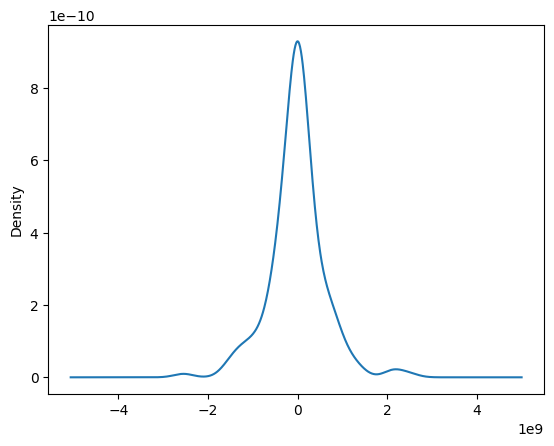

In [211]:
model_Arima_fit.resid.plot(kind='kde')

In [212]:
residuals.mean()

1425284004.6869824

In [213]:
pred_std = pred+residuals.std()
pred_mean = pred+residuals.mean()

<Axes: xlabel='date'>

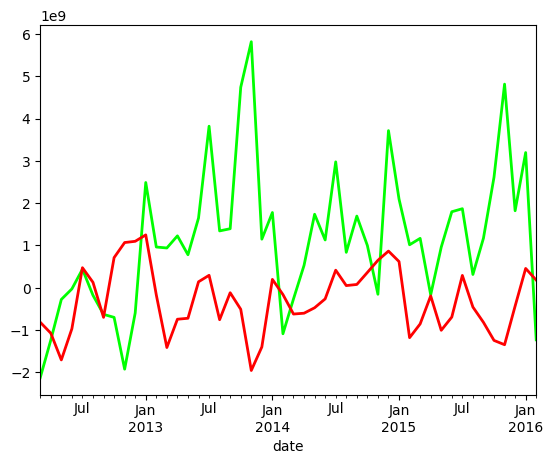

In [214]:
test_data.plot(color='lime',linewidth=2)
#pred.plot(color='g',linewidth=2)
pred.plot(color='r',linewidth=2)
#pred_std.plot(color='b',linewidth=2)

In [215]:
pred_end_date_future=datetime(2017,1,1)

In [216]:
pred1=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date_future)
residuals=test_data-pred

<Axes: xlabel='date'>

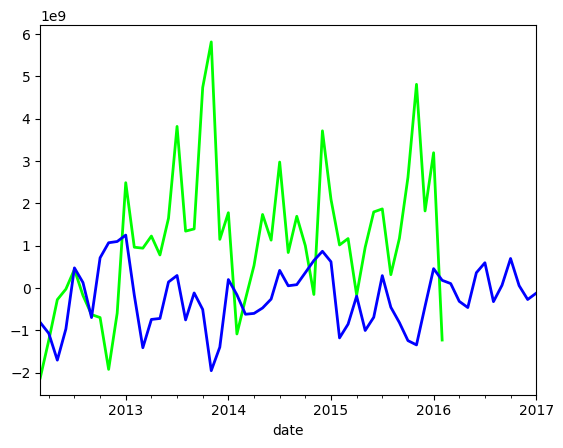

In [217]:
test_data.plot(color='lime',linewidth=2)
#pred.plot(color='g',linewidth=2)
pred1.plot(color='b',linewidth=2)
#pred_std.plot(color='b',linewidth=2)

In [218]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data,pred_mean)
rmse=np.sqrt(mse)

print(mse)
print(rmse)

3.6949561422190464e+18
1922226870.6422367


# SARIMA Model

In [219]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [258]:
model_SARIMA=SARIMAX(train_data,order=(24,1,1),seasonal_order=(0,1,0,2))

In [259]:
model_SARIMA_fit=model_SARIMA.fit()

In [260]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:           seasonal_first_difference   No. Observations:                  194
Model:             SARIMAX(24, 1, 1)x(0, 1, [], 2)   Log Likelihood               -4175.701
Date:                             Tue, 28 May 2024   AIC                           8403.401
Time:                                     16:50:57   BIC                           8487.960
Sample:                                 01-31-1996   HQIC                          8437.651
                                      - 02-29-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4796      0.595      0.805      0.421      -0.688       1.647
ar.L2         -0.7495      0.221     -3.395      0.001      -1.182      -0.317
ar.L3          0.2915      0.636      0.458      0.647      -0.955       1.538
ar.L4         -0.6354      0.376     -1.689      0.091      -1.373       0.102
ar.L5          0.2599      0.654      0.397      0.691      -1.022       1.542
ar.L6         -0.5957      0.418     -1.426      0.154      -1.414       0.223
ar.L7          0.2134      0.680      0.314      0.754      -1.120       1.547
ar.L8         -0.4746      0.471     -1.007      0.314      -1.398       0.449
ar.L9          0.1510      0.645      0.234      0.815      -1.114       1.416
ar.L10        -0.5484      0.440     -1.245      0.213      -1.412       0.315
ar.L11         0.1499      0.707      0.212      0.832      -1.236       1.536
ar.L12        -0.3830      0.468     -0.819      0.413      -1.300       0.534
ar.L13         0.1257      0.657      0.191      0.848      -1.162       1.413
ar.L14        -0.2539      0.427     -0.595      0.552      -1.090       0.583
ar.L15         0.2548      0.528      0.482      0.630      -0.780       1.290
ar.L16        -0.5355      0.292     -1.831      0.067      -1.109       0.038
ar.L17         0.2183      0.566      0.386      0.700      -0.890       1.327
ar.L18        -0.3051      0.312     -0.977      0.328      -0.917       0.307
ar.L19         0.1648      0.464      0.355      0.723      -0.746       1.075
ar.L20        -0.4021      0.280     -1.437      0.151      -0.950       0.146
ar.L21         0.1400      0.484      0.289      0.772      -0.809       1.089
ar.L22        -0.2004      0.299     -0.671      0.502      -0.786       0.385
ar.L23         0.1298      0.350      0.371      0.711      -0.556       0.815
ar.L24         0.1710      0.228      0.750      0.453      -0.276       0.618
ma.L1         -0.8511      0.573     -1.487      0.137      -1.973       0.271
sigma2      6.087e+17   2.25e-18   2.71e+35      0.000    6.09e+17    6.09e+17
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               317.02
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              10.36   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.83e+51. Standard errors may be unstable.
"""

In [261]:
test_data

date
2012-03-31   -2.125438e+09
2012-04-30   -1.237802e+09
2012-05-31   -2.756042e+08
2012-06-30   -2.736354e+07
2012-07-31    4.388480e+08
2012-08-31   -1.777356e+08
2012-09-30   -6.283029e+08
2012-10-31   -6.992891e+08
2012-11-30   -1.923160e+09
2012-12-31   -5.948879e+08
2013-01-31    2.488009e+09
2013-02-28    9.634149e+08
2013-03-31    9.406701e+08
2013-04-30    1.226821e+09
2013-05-31    7.805678e+08
2013-06-30    1.647455e+09
2013-07-31    3.818031e+09
2013-08-31    1.343853e+09
2013-09-30    1.395472e+09
2013-10-31    4.737387e+09
2013-11-30    5.814612e+09
2013-12-31    1.148892e+09
2014-01-31    1.778512e+09
2014-02-28   -1.086973e+09
2014-03-31   -2.636917e+08
2014-04-30    5.303178e+08
2014-05-31    1.737193e+09
2014-06-30    1.130371e+09
2014-07-31    2.975522e+09
2014-08-31    8.377584e+08
2014-09-30    1.694051e+09
2014-10-31    9.988936e+08
2014-11-30   -1.534631e+08
2014-12-31    3.713565e+09
2015-01-31    2.095616e+09
2015-02-28    1.016241e+09
2015-03-31    1.167872e

In [262]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2012-03-31 00:00:00
2016-02-29 00:00:00


In [263]:
pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-pred_Sarima

<Axes: xlabel='date'>

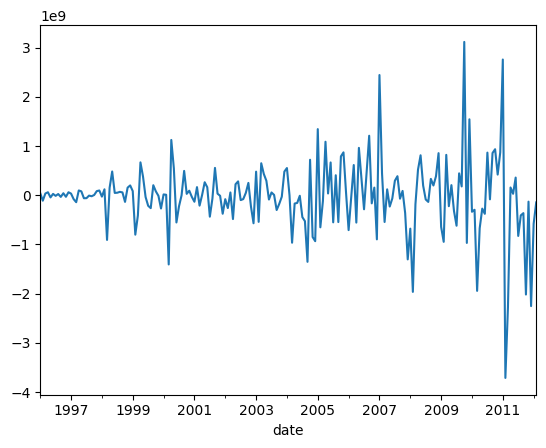

In [264]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

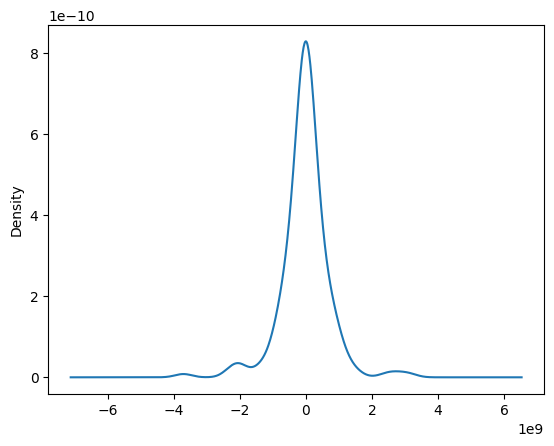

In [265]:
model_SARIMA_fit.resid.plot(kind='kde')

In [266]:
pred_Sarima

2012-03-31   -1.652833e+09
2012-04-30   -2.100917e+09
2012-05-31   -3.366756e+09
2012-06-30   -2.566566e+09
2012-07-31   -7.450694e+08
2012-08-31   -1.240979e+09
2012-09-30   -1.147242e+09
2012-10-31   -6.535307e+08
2012-11-30    8.784605e+08
2012-12-31    3.615742e+08
2013-01-31    6.890209e+08
2013-02-28   -2.515844e+09
2013-03-31   -3.219405e+09
2013-04-30   -3.408948e+09
2013-05-31   -3.050725e+09
2013-06-30   -2.951129e+09
2013-07-31   -2.431469e+09
2013-08-31   -2.812492e+09
2013-09-30   -1.998013e+09
2013-10-31   -2.769691e+09
2013-11-30   -3.181717e+09
2013-12-31   -3.685216e+09
2014-01-31   -2.313361e+09
2014-02-28   -2.907399e+09
2014-03-31   -3.622777e+09
2014-04-30   -4.621169e+09
2014-05-31   -5.133577e+09
2014-06-30   -4.772623e+09
2014-07-31   -3.410762e+09
2014-08-31   -3.868282e+09
2014-09-30   -3.401100e+09
2014-10-31   -3.354416e+09
2014-11-30   -2.452104e+09
2014-12-31   -3.251790e+09
2015-01-31   -3.486743e+09
2015-02-28   -5.281746e+09
2015-03-31   -5.248191e+09
2

In [267]:
pred_Sarima = pred_Sarima+residuals.std()

<Axes: xlabel='date'>

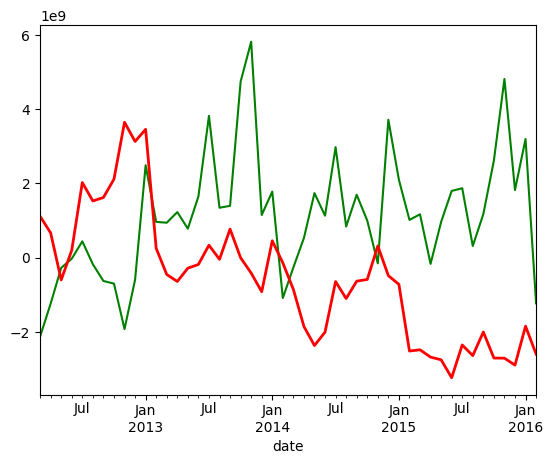

In [268]:
test_data.plot(color='g')
pred_Sarima.plot(color='r',linewidth=2)

In [272]:
pred1=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date_future)
residuals=test_data-pred

<Axes: xlabel='date'>

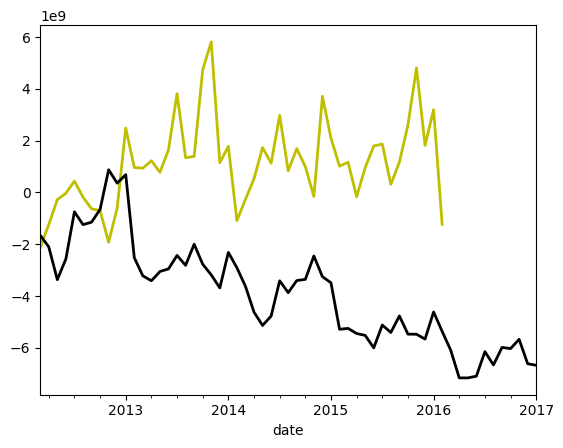

In [273]:
test_data.plot(color='y',linewidth=2)
#pred.plot(color='g',linewidth=2)
pred1.plot(color='k',linewidth=2)
#pred_std.plot(color='b',linewidth=2)

In [274]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_data,pred_Sarima)
rmse=np.sqrt(mse)

print(mse)
print(rmse)

1.0351896041108937e+19
3217436252.8430824


# LSTM Neural Network Model

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
df = pd.read_csv("S:\PROJECT\Mentorness Market Price Prediction\Cleaned Data",index_col='date',parse_dates=True)


In [277]:
df.index

DatetimeIndex(['2005-01-01', '2006-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2005-02-01', '2006-02-01',
               ...
               '2006-12-01', '2007-12-01', '2008-12-01', '2009-12-01',
               '2010-12-01', '2011-12-01', '2012-12-01', '2013-12-01',
               '2014-12-01', '2015-12-01'],
              dtype='datetime64[ns]', name='date', length=9751, freq=None)

In [278]:
df.head(3)

Net_Sales
date                 
2005-01-01    1052800
2006-01-01     505800
2010-01-01    1135230

<Axes: xlabel='date'>

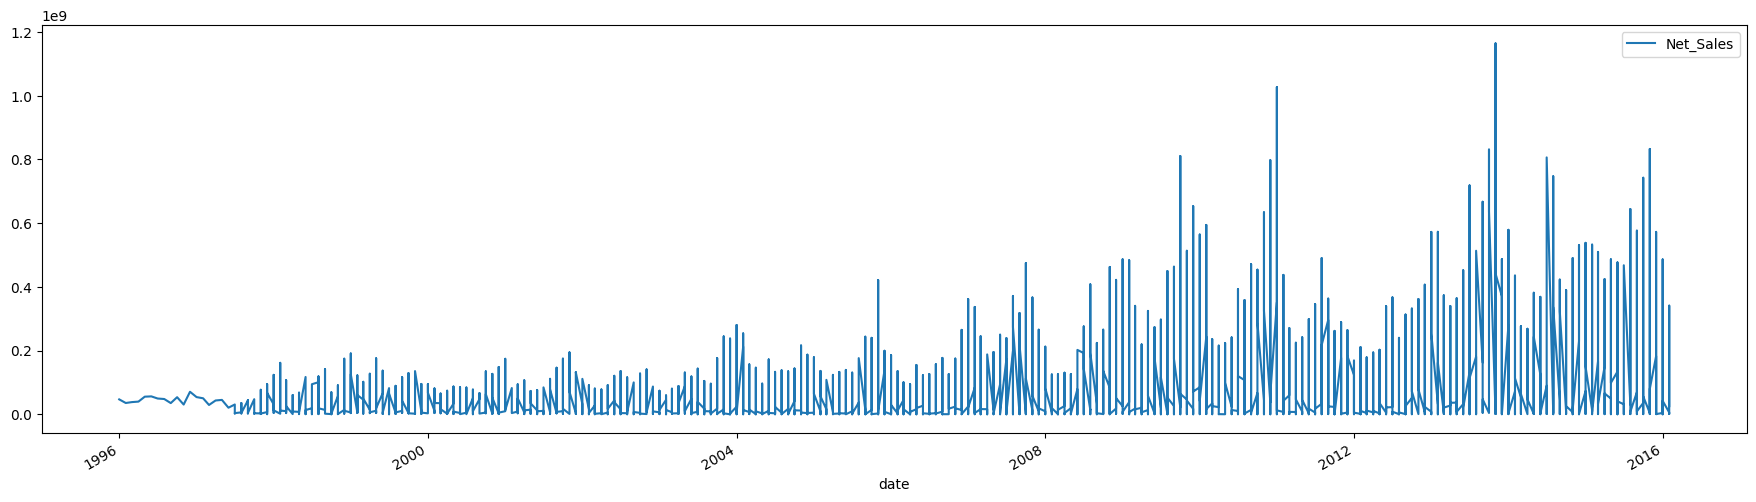

In [279]:
df.plot(figsize=(22,6))

In [280]:
df = df.resample('M').sum()

In [281]:
df.head()

Net_Sales
date                 
1996-01-31   46813104
1996-02-29   35505684
1996-03-31   38304288
1996-04-30   39866544
1996-05-31   55354742

<Axes: xlabel='date'>

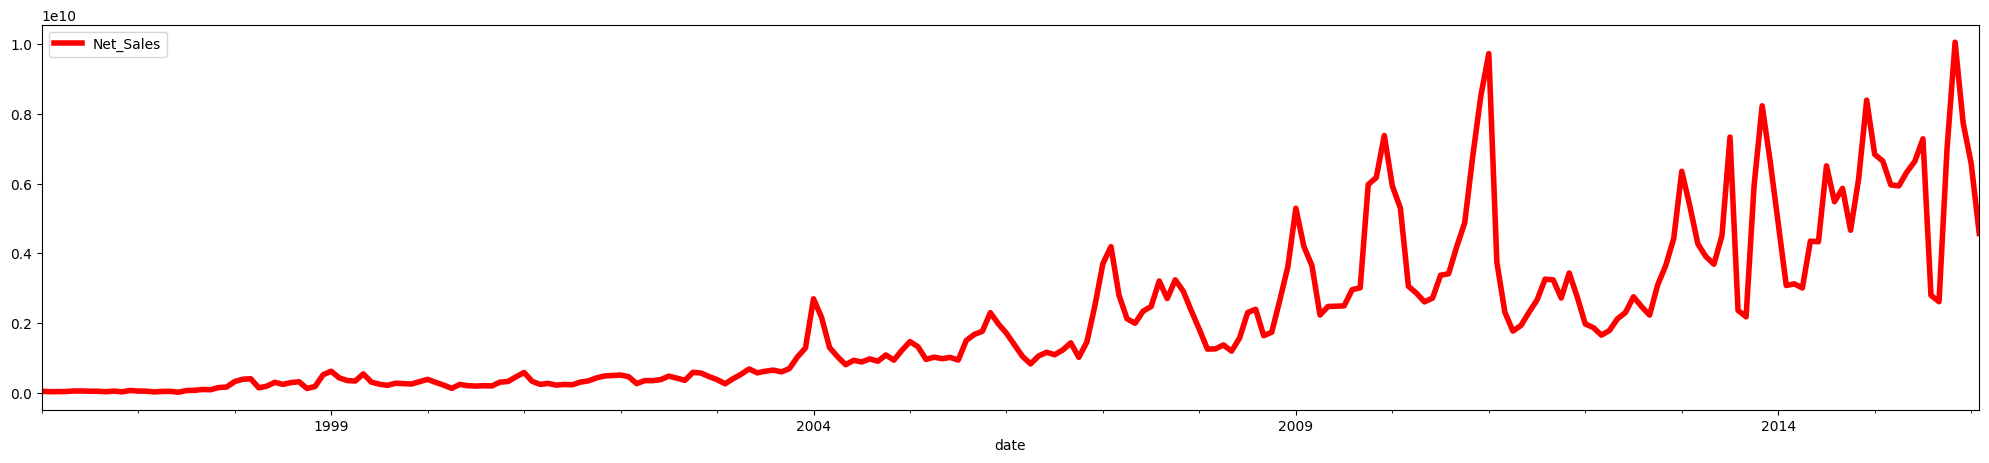

In [282]:
df.plot(figsize=(25,5),color='r',linewidth=4)

In [283]:
import statsmodels.api as sm

<Figure size 2500x500 with 0 Axes>

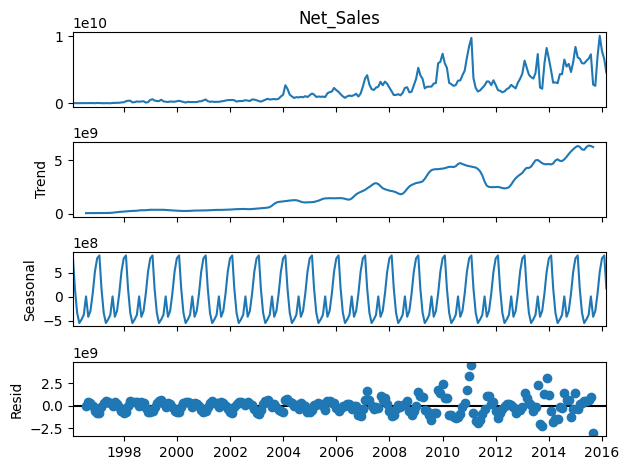

In [284]:
decomposition = sm.tsa.seasonal_decompose(df['Net_Sales'])
plt.figure(figsize=(25,5))
fig= decomposition.plot()
plt.show()


In [285]:
len(df)

242

In [286]:
train = df.iloc[:194]
test = df.iloc[194:]

In [287]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [288]:
df.head(),df.tail()

(            Net_Sales
 date                 
 1996-01-31   46813104
 1996-02-29   35505684
 1996-03-31   38304288
 1996-04-30   39866544
 1996-05-31   55354742,
               Net_Sales
 date                   
 2015-10-31   7013835427
 2015-11-30  10059518692
 2015-12-31   7744827221
 2016-01-31   6581723878
 2016-02-29   4577341621)

In [289]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [290]:
scaled_train[:10]

array([[0.00268559],
       [0.0015215 ],
       [0.00180961],
       [0.00197045],
       [0.00356495],
       [0.00365958],
       [0.00296647],
       [0.00280719],
       [0.00149173],
       [0.00339261]])

In [291]:
import keras.preprocessing.sequence

In [292]:
from keras import Sequential

In [293]:
from keras.layers import Dense

In [294]:
from keras import preprocessing

In [295]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [296]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [297]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00268559 0.0015215  0.00180961 0.00197045 0.00356495 0.00365958
 0.00296647 0.00280719 0.00149173 0.00339261 0.0010187  0.00514895]
Predict this y: 
 [[0.00342903]]


In [298]:
X.shape

(1, 12, 1)

In [299]:
# We do the same thing, but now instead for 12 months
n_input = 48
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [300]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [301]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [302]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┓
┃               ┃ Output   ┃ Param ┃
┃ Layer (type)  ┃ Shape    ┃     # ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━┩
│ lstm_1 (LSTM) │ (None,   │ 40,8… │
│               │ 100)     │       │
├───────────────┼──────────┼───────┤
│ dense_1       │ (None,   │   101 │
│ (Dense)       │ 1)       │       │
└───────────────┴──────────┴───────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [303]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0245
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0174
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0114
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0098
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0116
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0128
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0139
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0183
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0132
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0130
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0094
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0070
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064
Epoch 15/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 

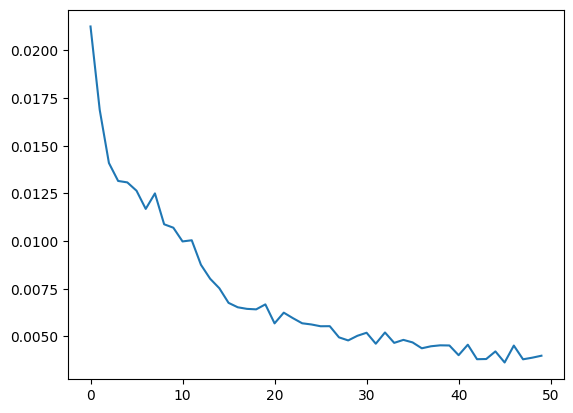

In [304]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [305]:
last_train_batch = scaled_train[-48:]

In [306]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [307]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


array([[0.19734542]], dtype=float32)

In [308]:
scaled_test[0]

array([0.16857983])

In [309]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [310]:
test_predictions

[array([0.19734542], dtype=float32),
 array([0.2244741], dtype=float32),
 array([0.25522932], dtype=float32),
 array([0.2780587], dtype=float32),
 array([0.28926787], dtype=float32),
 array([0.28867596], dtype=float32),
 array([0.27990374], dtype=float32),
 array([0.2725656], dtype=float32),
 array([0.27530655], dtype=float32),
 array([0.290043], dtype=float32),
 array([0.3139729], dtype=float32),
 array([0.34378165], dtype=float32),
 array([0.37580752], dtype=float32),
 array([0.40556484], dtype=float32),
 array([0.42782268], dtype=float32),
 array([0.43775207], dtype=float32),
 array([0.4343204], dtype=float32),
 array([0.422432], dtype=float32),
 array([0.4120174], dtype=float32),
 array([0.41416302], dtype=float32),
 array([0.43251875], dtype=float32),
 array([0.4641034], dtype=float32),
 array([0.50290596], dtype=float32),
 array([0.5402725], dtype=float32),
 array([0.5586033], dtype=float32),
 array([0.5354191], dtype=float32),
 array([0.4682804], dtype=float32),
 array([0.395948

In [311]:
test.head()

Net_Sales
date                  
2012-03-31  1658220194
2012-04-30  1789430778
2012-05-31  2125591215
2012-06-30  2307847429
2012-07-31  2758991952

In [312]:
true_predictions = scaler.inverse_transform(test_predictions)

In [313]:
test['Predictions'] = true_predictions

<Axes: xlabel='date'>

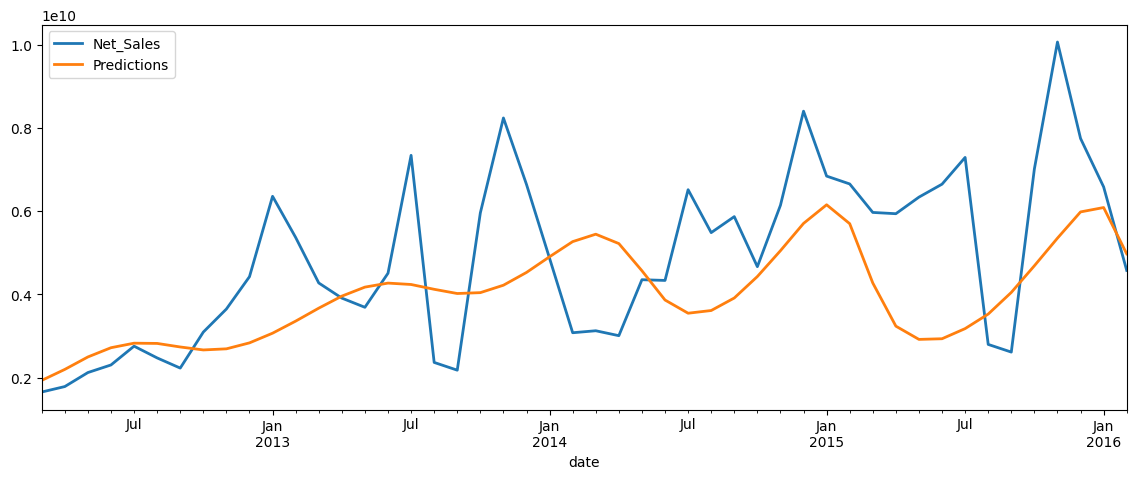

In [314]:
test.plot(figsize=(14,5),linewidth=2)

In [315]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Net_Sales'],test['Predictions']))
print("RMSE",rmse)

RMSE 1978009285.7738008


# Prophet Model

In [316]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [317]:
df = pd.read_csv("S:\PROJECT\Mentorness Market Price Prediction\Cleaned Data",index_col='date',parse_dates=True)

In [318]:
df.columns = ['y']

In [319]:
df.index.names = ['ds']

In [135]:
df.head(3)

y
ds                 
2005-01-01  1052800
2006-01-01   505800
2010-01-01  1135230

In [136]:
df.reset_index(level=None,inplace=True)
df.head(3)

ds        y
0 2005-01-01  1052800
1 2006-01-01   505800
2 2010-01-01  1135230

In [137]:
train = df.iloc[:len(df)-48]
test = df.iloc[len(df)-48:]

In [138]:
test.head(3)

ds          y
9703 2011-08-01  112770061
9704 2012-08-01   85336804
9705 2014-08-01  133037443

In [139]:
m = Prophet()
m.fit(train)

16:44:51 - cmdstanpy - INFO - Chain [1] start processing
16:44:52 - cmdstanpy - INFO - Chain [1] done processing


In [140]:
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

In [141]:
plot_plotly(m ,forecast)

In [142]:
plot_components_plotly(m, forecast)

In [143]:
predictions = forecast.iloc[-48:]['yhat']
predictions

559    5.648905e+07
560    5.038200e+07
561    4.504381e+07
562    4.066708e+07
563    3.741520e+07
564    3.541742e+07
565    3.476492e+07
566    3.550804e+07
567    3.765463e+07
568    4.116973e+07
569    4.597644e+07
570    5.195808e+07
571    5.896155e+07
572    6.680174e+07
573    7.526693e+07
574    8.412501e+07
575    9.313032e+07
576    1.020310e+08
577    1.105763e+08
578    1.185243e+08
579    1.256494e+08
580    1.317487e+08
581    1.366487e+08
582    1.402104e+08
583    1.423341e+08
584    1.429624e+08
585    1.420828e+08
586    1.397279e+08
587    1.359754e+08
588    1.309462e+08
589    1.248011e+08
590    1.177368e+08
591    1.099804e+08
592    1.017833e+08
593    9.341386e+07
594    8.515021e+07
595    7.727198e+07
596    7.005241e+07
597    6.375038e+07
598    5.860280e+07
599    5.481754e+07
600    5.256716e+07
601    5.198352e+07
602    5.315356e+07
603    5.611623e+07
604    6.086079e+07
605    6.732643e+07
606    7.540335e+07
Name: yhat, dtype: float64

In [144]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(forecast.iloc[-48:]['yhat'],test['y']))
print("RMSE",rmse)

RMSE 75342491.95617996
